# cygnus-naboo
Figures for Cygnus paper using new config (`cygnus`, 100M warmup + 200M sim)

Using new Naboo scripts to make things easier!

In [4]:
from collections import defaultdict
from importlib import reload
from matplotlib import colormaps
# from utils import plots, stats, tables, utils

from plot_utils import collate, plot

# Configuration

In [5]:
sim_dir = "/u/cmolder/GitHub/ChampSim/sim/"
baseline_study = "stu_test"
baseline_experiment = "_baseline"
weights_path = "/u/cmolder/GitHub/ChampSim/naboo/conf/weights.toml"

suites = [
    "all",
    "spec06",
    "spec17",
    "cloudsuite"
]
stats  = [
    "cpu.gmean.ipc_improvement",
]
dpi = 150
cmaps = {
    'Pythia': colormaps['Blues'],
    'Pythia-Ignore': colormaps['Purples'],
    'Pythia-Width': colormaps['Greys'],
    'Cygnus': colormaps['Reds'],
    'Cygnus-Ignore': colormaps['Greens'],
    'Cygnus-Width': colormaps['Oranges'],
}

In [7]:
reload(collate)
studies = {
    # Baseline
    "stu_test":   collate.StudyCollator(sim_dir, "stu_test", 
                                        baseline_study=baseline_study, 
                                        baseline_experiment=baseline_experiment,
                                        weights_path=weights_path),
    "stu_cygnus": collate.StudyCollator(sim_dir, "stu_cygnus",
                                        baseline_study=baseline_study, 
                                        baseline_experiment=baseline_experiment,
                                        weights_path=weights_path),
    "stu_my5":    collate.StudyCollator(sim_dir, "stu_my5",
                                        baseline_study=baseline_study,
                                        baseline_experiment=baseline_experiment,
                                        weights_path=weights_path),
}

[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 707/707 [00:04<00:00, 172.59file/s]


[ipykernel_launcher][angrist-3] Generating benchmark stats for 38 benchmarks over 7 experiments:
    Benchmarks : bc leslie3d 605.mcf sssp libquantum 607.cactuBSSN cactusADM 628.pop2 nutch cc merced cloud9 mcf classifcation bwaves omnetpp delta whiskey sphinx3 bfs GemsFDTD zeusmp 619.lbm tc charlie 602.gcc 627.cam4 soplex 623.xalancbmk cassandra 620.omnetpp pr 649.fotonik3d milc astar lbm gcc xalancbmk
    Experiments: pf_sms pf_dspatch _baseline pf_spp pf_bingo pf_spp_ppf pf_mlop
        


[ipykernel_launcher][angrist-3] Generating benchmark stats: 100%|██████████| 266/266 [00:02<00:00, 119.24it/s]


[ipykernel_launcher][angrist-3] Generating suite stats for 6 suites over 7 experiments:
    Suites     : google spec06 cloudsuite gap spec17 all
    Experiments: pf_sms pf_dspatch _baseline pf_spp pf_bingo pf_spp_ppf pf_mlop
        


[ipykernel_launcher][angrist-3] Generating suite stats: 100%|██████████| 42/42 [00:02<00:00, 20.97it/s]
[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 303/303 [00:06<00:00, 46.37file/s]


[ipykernel_launcher][angrist-3] Generating benchmark stats for 38 benchmarks over 3 experiments:
    Benchmarks : bc leslie3d 605.mcf sssp libquantum 607.cactuBSSN cactusADM 628.pop2 nutch cc merced cloud9 mcf classifcation bwaves omnetpp delta whiskey sphinx3 bfs GemsFDTD zeusmp 619.lbm tc charlie 602.gcc 627.cam4 soplex 623.xalancbmk cassandra 620.omnetpp pr 649.fotonik3d milc astar lbm gcc xalancbmk
    Experiments: pf_cygnus pf_pythia pf_cygnus_depth
        


[ipykernel_launcher][angrist-3] Generating benchmark stats: 100%|██████████| 114/114 [00:01<00:00, 73.58it/s] 

[ipykernel_launcher][angrist-3] Generating suite stats for 6 suites over 3 experiments:
    Suites     : google spec06 cloudsuite gap spec17 all
    Experiments: pf_cygnus pf_pythia pf_cygnus_depth
        



[ipykernel_launcher][angrist-3] Generating suite stats: 100%|██████████| 18/18 [00:01<00:00, 11.63it/s]
[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 101/101 [00:01<00:00, 92.86file/s]


[ipykernel_launcher][angrist-3] Generating benchmark stats for 38 benchmarks over 1 experiments:
    Benchmarks : bc leslie3d 605.mcf sssp libquantum 607.cactuBSSN cactusADM 628.pop2 nutch cc merced cloud9 mcf classifcation bwaves omnetpp delta whiskey sphinx3 bfs GemsFDTD zeusmp 619.lbm tc charlie 602.gcc 627.cam4 soplex 623.xalancbmk cassandra 620.omnetpp pr 649.fotonik3d milc astar lbm gcc xalancbmk
    Experiments: pf_my5
        


[ipykernel_launcher][angrist-3] Generating benchmark stats: 100%|██████████| 38/38 [00:01<00:00, 33.69it/s]

[ipykernel_launcher][angrist-3] Generating suite stats for 6 suites over 1 experiments:
    Suites     : google spec06 cloudsuite gap spec17 all
    Experiments: pf_my5
        



[ipykernel_launcher][angrist-3] Generating suite stats: 100%|██████████| 6/6 [00:01<00:00,  5.89it/s]


# Plots

## Dynamic degree

In [21]:
degreedyn_1core_df = {
    'Cygnus':       studies['stu_cygnus']['pf_cygnus'],
    'Cygnus Depth': studies['stu_cygnus']['pf_cygnus_depth'],
    'Pythia':       studies['stu_cygnus']['pf_pythia'],

    #'Bingo':   studies['stu_test']['pf_bingo'],
    #'SMS':     studies['stu_test']['pf_sms'],
    #'SPP':     studies['stu_test']['pf_spp'],
    'SPP+PPF': studies['stu_test']['pf_spp_ppf'],
    #'MLOP':    studies['stu_test']['pf_mlop'],
    #'DSPatch': studies['stu_test']['pf_dspatch'],
    'my5':     studies['stu_my5']['pf_my5'],
}
degreedyn_1core_colors = defaultdict(lambda: None, {
    'Cygnus':       colormaps['Set3'](0), #cmaps['Cygnus-Width'](0.65),
    'Cygnus Depth': colormaps['Set3'](1), #cmaps['Cygnus-Ignore'](0.65),
    'Pythia':       colormaps['Set3'](2), #cmaps['Pythia'](0.65),
    #'Pythia +Ignore':                    #cmaps['Pythia-Ignore'](0.65),
    #'Pythia Width':                      #cmaps['Pythia-Width'](0.5),

    'Bingo':    colormaps['Set3'](3), #'purple',
    'SMS':      colormaps['Set3'](4), #'royalblue',
    'SPP':      colormaps['Set3'](5), #'royalblue',
    'SPP+PPF':  colormaps['Set3'](6), #'darkturquoise',
    'MLOP':     colormaps['Set3'](7), #'deeppink',
    'DSPatch':  colormaps['Set3'](8), #'darkred',
    'my5': colormaps['Set3'](9), #'gold',
})

degreedyn_1core_hatches = defaultdict(lambda: None, {
    # 'Pythia': '\\\\',
    # 'Pythia +Ignore': '\\\\',
    # 'Pythia-Width': '\\\\',

    # 'Cygnus Depth': '//',
    # 'Cygnus': '//',
    # 'Cygnus MSHRAware': '//',
    # 'Cygnus ActionPrio': '//',
    # 'Cygnus ActionPrio Max8': '//',
    # 'Cygnus Ideal': '//',
    
    # 'Bingo': '..',
    # 'MLOP': '-',
    # 'SPP': 'x',
    # 'SPP+PPF': 'x',
    # 'BO-Width': 'o',
})

degreedyn_1core_legend_kwargs = {
    'ncol': 4,
    'fontsize': 6.75,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

degreedyn_1core_legend_kwargs_wide = {
    'ncol': 8,
    'fontsize': 6.75,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

degreedyn_1core_label_kwargs = {
    'rotation': 0,
    'ha': 'center',
    'fontsize': 7,
}

### IPC improvement

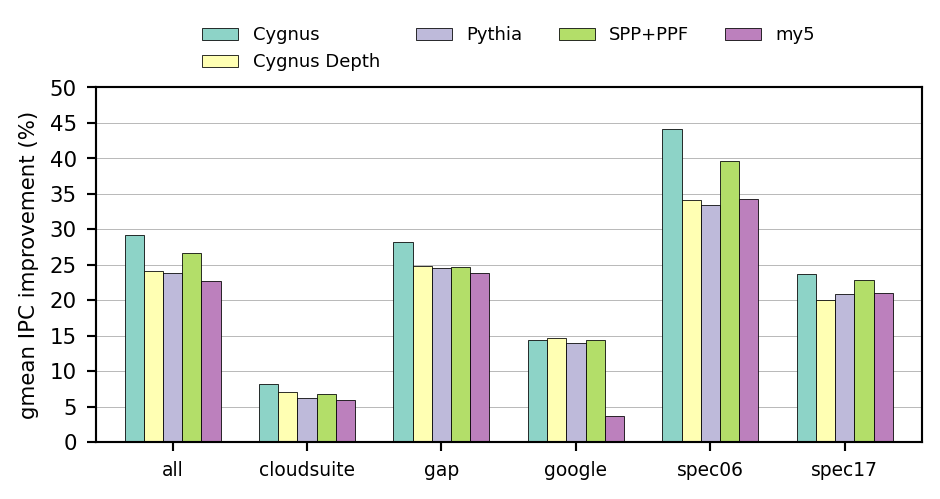

In [22]:
reload(plot)
plot.plot_suite_statistic(
    degreedyn_1core_df, "cpu.gmean.ipc_improvement",
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='gmean IPC improvement (%)',
    ylim=(0, 50),
    ytick_distance=5,
    dpi=192, figsize=(5, 2.7))

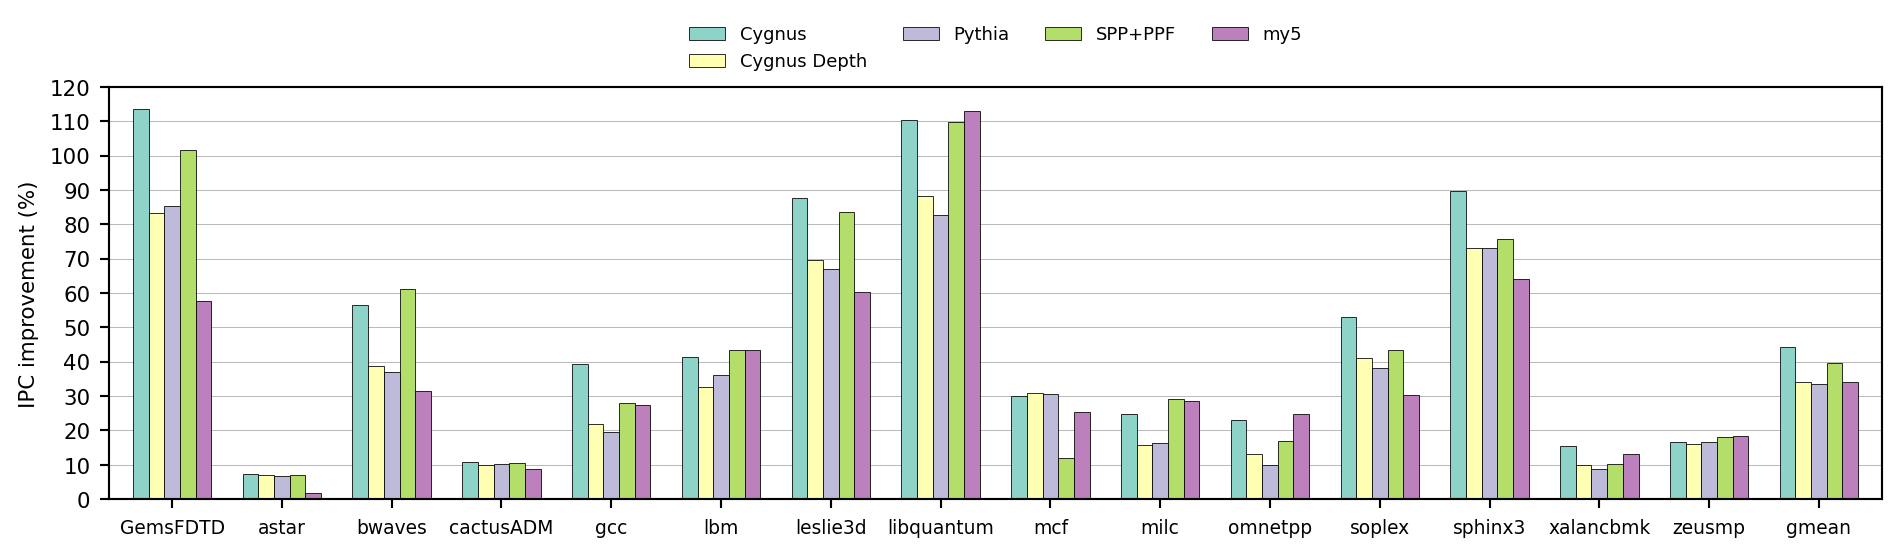

In [23]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='IPC improvement (%)',
    ylim=(0, 120),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))
# import matplotlib.pyplot as plt
# plt.savefig('../../cvs/papers/micro-23r/figures/results_summary.pdf')

### L2C accuracy

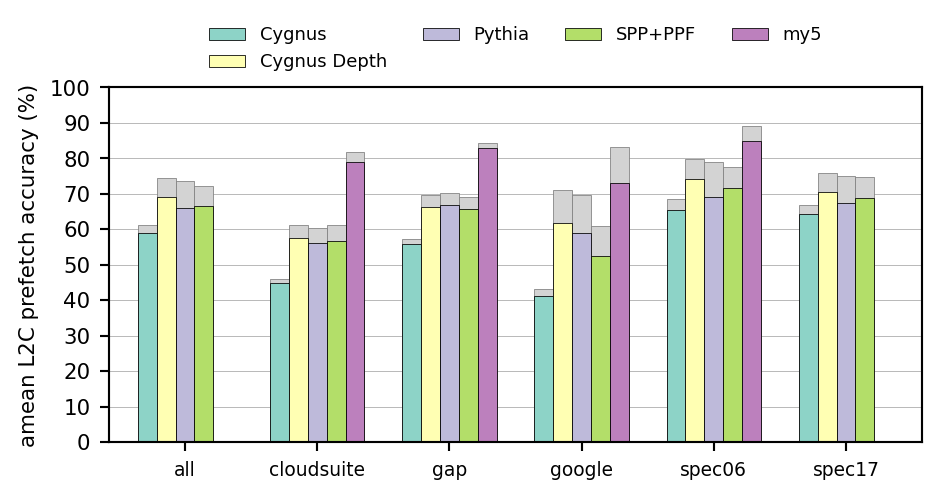

In [24]:
reload(plot)
plot.plot_suite_statistic(
    degreedyn_1core_df, "cache.L2C.amean.pf_timely_accuracy",
    secondary_statistic_name="cache.L2C.amean.pf_accuracy",
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='amean L2C prefetch accuracy (%)',
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(5, 2.7))

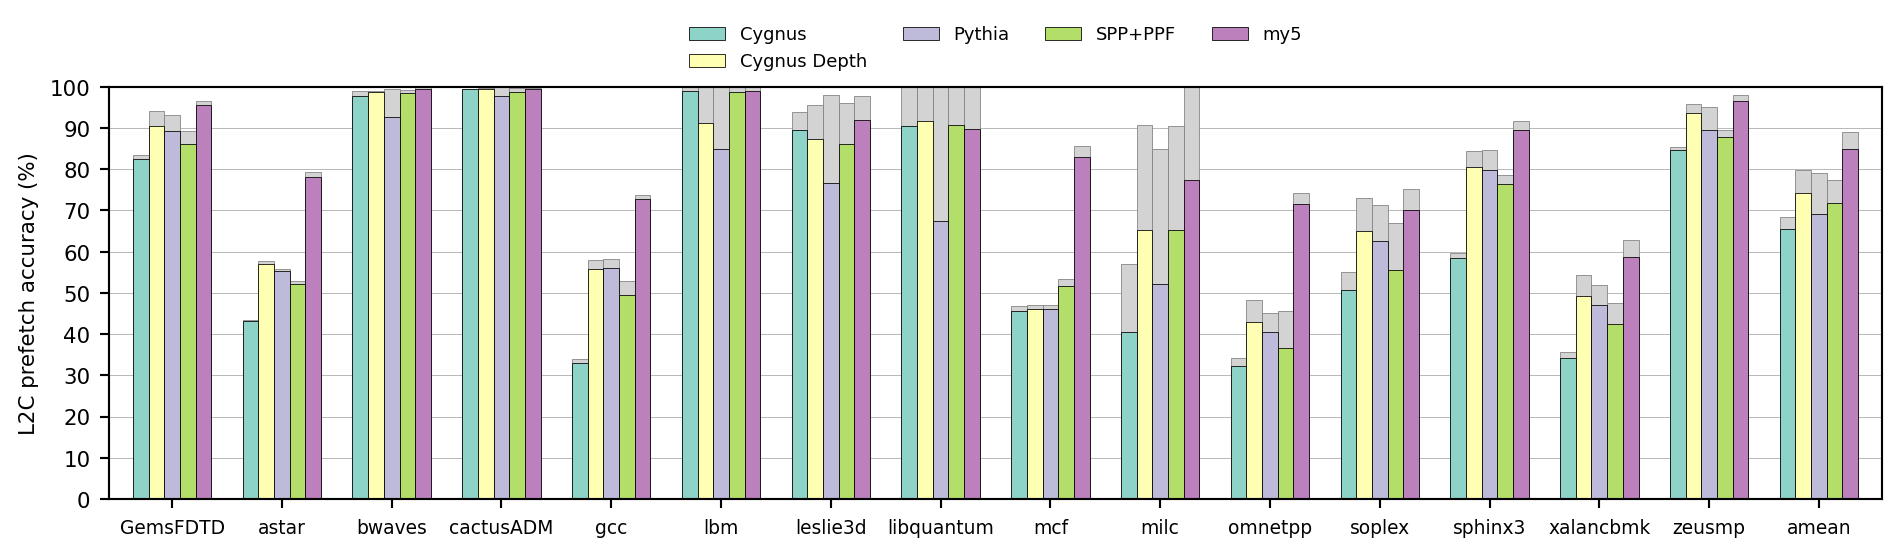

In [25]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "spec06", "cache.L2C.amean.pf_timely_accuracy",
    secondary_statistic_name="cache.L2C.amean.pf_accuracy",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='L2C prefetch accuracy (%)',
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))

### L2C coverage

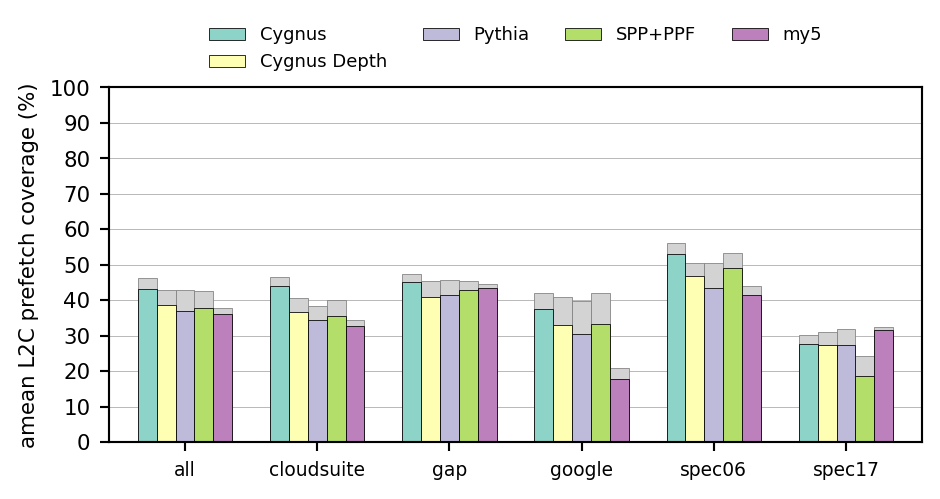

In [26]:
reload(plot)
plot.plot_suite_statistic(
    degreedyn_1core_df, "cache.L2C.amean.pf_coverage",
    secondary_statistic_name="cache.L2C.amean.pf_untimely_coverage",
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='amean L2C prefetch coverage (%)',
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(5, 2.7))

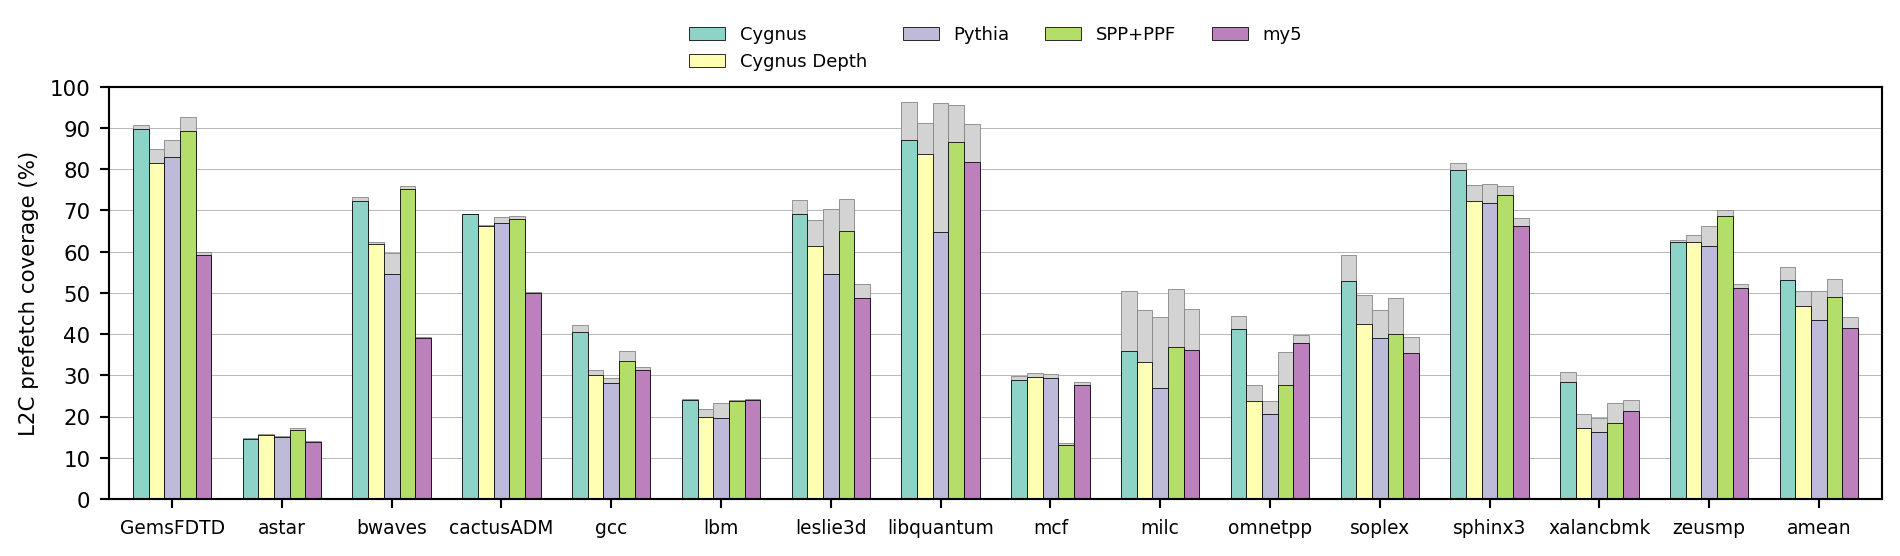

In [27]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "spec06", "cache.L2C.amean.pf_coverage",
    secondary_statistic_name="cache.L2C.amean.pf_untimely_coverage",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='L2C prefetch coverage (%)',
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))